# <u> COGS 118B Assignment 1 </u>

In this Assignment we will be implementing **K-means clustering** on 2D points. The algorithm is to divide the given set of points into **k** clusters (groups), such that all points in a cluster are "close together". The number **k** is chosen in advance manually and is not computed by the algorithms.

***In this assignment, please complete the code only in the cells which mention that you should do so in the code comments.***



### Section 0 : Academic Integrity (1 point)

 What is allowed:

1. Studying material using online resources.
2. Collaborate with classmates (ex: studying for the exam in pairs and fixing each other’s code.)
3. Asking ChatGPT to help you understand concepts. (make sure ChatGPT is speaking the truth) If you are studying for a concept that is in an assignment, make sure to provide citations. (ex. What prompt did you use?)

What is NOT allowed:

1. Copying answers from online resources word by word. If you cannot understand it, do not copy it.

2. Copying answers from your peers.
3. Using answers directly generated by ChatGPT or other AI tools. If you used AI tools to help you answer homework questions, please cite the AI tools you have used. Directly copying and pasting solutions from online tools without proper learning and citations is considered cheating. It would not be smart to cheat using machine learning tools in a machine learning class. We will flag you if we detech any suspicious responses.

If you have read the rules above. Response "I have read the rules above." below.

(YOUR ANSWER HERE)

## I have read the rules above.

K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. Because of K-means is only able to define spherical clusters, K-Means may underperform sometimes.

<b><u>Use Cases:</u></b>
- Document Classification
- Delivery Store Optimization
- Customer Segmentation
- Insurance Fraud Detection etc.

### <u> Algorithm </u>:

Κ-means clustering algorithm inputs are the number of clusters Κ and the data set. Algorithm starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

<b><u>1. Data assigment step:</u></b>

Each centroid defines one of the clusters. In this step, each data point based on the squared Euclidean distance is assigned to its nearest centroid. If $c_i$ is the collection of centroids in set C, then each data point x is assigned to a cluster based on

$$\underset{c_i \in C}{\min} \; dist(c_i,x)^2$$

where dist( · ) is the standard (L2) Euclidean distance.

<b><u>2. Centroid update step:</u></b>

Centroids are recomputed by taking the mean of all data points assigned to that centroid's cluster.

The algorithm iterates between step one and two until a stopping criteria is met (cluster centers stops changing, the sum of the distances is minimized, or some maximum number of iterations is reached). In this assignment, we will use the first criterion, i.e. that no cluster centers change.

<b>This algorithm may converge on a local optimum. </b> Assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal

### Generating the data

We will generate 3 datasets to use in this assignment. They are created in the following code, and stored in `X1`, `X2` and `X3` respectively. They are each set of 500 2D points. We store them as matrices of size $500 \times 2$.

Please use these variables `X1`, `X2` and `X3` to run your kmeans in this assignment.

X1 shape:  (500, 2)


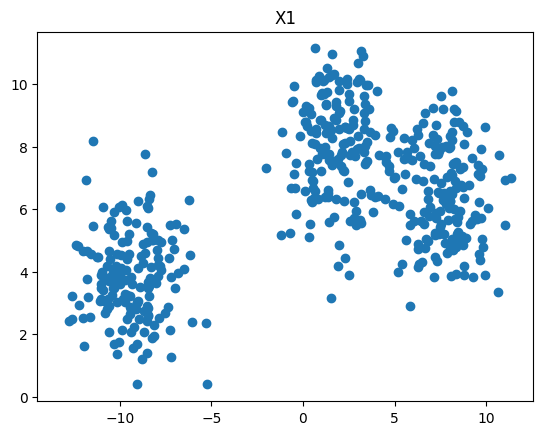

X2 shape:  (500, 2)


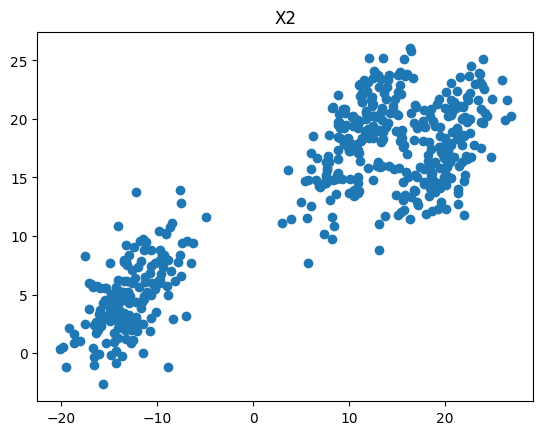

X3 shape:  (500, 2)


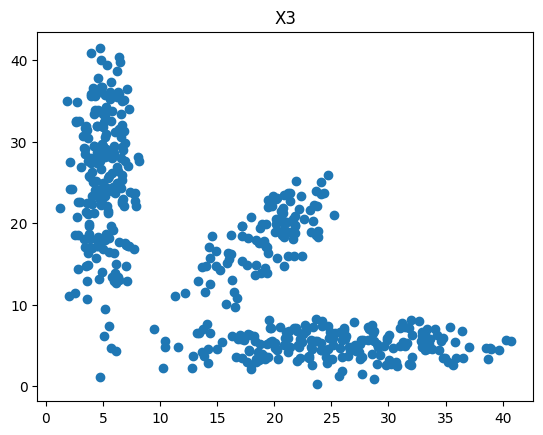

In [2]:
"""
This cell has been completed for you. You don't need to change it.
"""

X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)
X1 = np.dot(X,np.random.RandomState(0).randn(2,2))

print('X1 shape: ', X1.shape)

plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.title('X1')
plt.show()

centers = [[4, 7], [9, 9], [9, 2]]

X2,Y2 = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=centers)
X2 = np.dot(X1,np.random.RandomState(0).randn(2,2))

print('X2 shape: ', X2.shape)

plt.scatter([x[0] for x in X1], [x[1] for x in X1])
plt.title('X2')
plt.show()

centers = [[5, 5]]
X31,Y31 = make_blobs(cluster_std=1.5,random_state=20,n_samples=200,centers=centers)
X31 = np.dot(X31, np.array([[1.0, 0], [0, 5.0]]))

centers = [[5, 5]]
X32,Y32 = make_blobs(cluster_std=1.5,random_state=20,n_samples=200,centers=centers)
X32 = np.dot(X32, np.array([[5.0, 0], [0, 1.0]]))

centers = [[7, 7]]
X33, Y33 = make_blobs(cluster_std=1.5,random_state=20,n_samples=100,centers=centers)
X33 = np.dot(X33, np.random.RandomState(0).randn(2,2))

X3 = np.vstack((X31, X32, X33))

print('X3 shape: ', X3.shape)

plt.scatter([x[0] for x in X3], [x[1] for x in X3])
plt.title('X3')
plt.show()

### KMeans Algorithm Class

Now we will start coding the K-means algorithm. All the code will be in the `KmeansModel` class.

We start by initializing the class. To initialize, we specify the data matrix **X** and the number of clusters **k**. **X** is a matrix of shape $N \times 2$, as we have **N** points each with x and y coordinates. We set `self.N` as the number of points and `self.dim` as the number of dimensions (2).

We need to store $k$ centroids, one for each cluster. We shall store them as a $K \times 2$ matrix in `self.centroids`. We initialize the centroids to be random points from our dataset.

If the model is not converging, we stop running it if the number of iterations has reached `max_iters`.

Finally we plot the final clustered data with the initial (random) clustering.

**To-do** (2 points)

1.1 Initialize centroids. (1 point)

1.2 Find the initial labels using the initial centroids. (You will have to write the `get_labels` method (1.3) first before completing this part.) (1 point)

In [3]:
class KmeansModel:
    
    def __init__(self, X, k, max_iters):
        self.X = X
        self.k = k
        self.max_iters = max_iters
        
        self.dim = X.shape[1]
        self.N = X.shape[0]
        
        
        self.centroids = np.zeros((self.k, self.dim))
        initial_labels = np.zeros((self.N))           
        #YOUR CODE HERE

        # Pick k centroids from N data points, without replacements [From reading NumPy documentation](Link: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)
        self.centroids = self.X[np.random.choice(self.N, self.k, replace=False)] 
        initial_labels = self.get_labels(self.X, self.centroids)
        
        self.plot_data(initial_labels, 'Data with initial random clusters')

To color each point according to its cluster, we need to specify a **label** for each point. A label is just an integer `between 0 and k-1`, which corresponds to the index of the cluster that the datapoint belongs to. Labels for all points in the same cluster must be the same.

So we make a function `get_labels(X, centroids)`. This function takes in our $N \times 2$ data matrix **X**, and our $k \times 2$ centroid matrix. It should return a $N \times 1$ numpy array (or a length $N$ numpy vector) `labels`, such that `labels[i]` is the index of the cluster of the `i`'th point.

To do this, we should iterate over all the points. For each point we should iterate over all the centroids, and choose the one which is the closest (least Euclidean distance) to the point. We can simply use the index of that centroid (`0 <= index < k`) as the label for that point. Finally, we return the array of labels for all the points.

**To-do** (3 points)

1.3 Complete method `get_label`.


In [4]:
def get_labels(self, X, centroids):
    labels = []
    #YOUR CODE HERE

    # Create a way to store distances from a data point to every centroids
    data_point_to_centroid = []

    # Loop over all points in X
    for point in X:
        
        # Loop over all centroids
        for centroid in centroids:

            # Compute and store all distances between current data point and every centroid
            point_to_centroid_distance = np.linalg.norm(point - centroid)
            data_point_to_centroid.append(point_to_centroid_distance)

        # Find the index of the centroid that is closest to the current data point
        minimum_distance_index = np.argmin(data_point_to_centroid)

        # Add the index to labels
        labels.append(minimum_distance_index)

        # Clear all distances from current iteration for the next data point iterations
        data_point_to_centroid.clear()

    return np.array(labels)

KmeansModel.get_labels = get_labels # We define this function to be a function of the KmeansModel class.

Here we have a function to plot our data. This function takes in the labels, and colors each point according to its cluster, as defined by the labels we computed above.

In [5]:
def plot_data(self, labels, title):
    fig = plt.figure(figsize=(7,7))
    ax0 = fig.add_subplot(111)
    ax0.scatter(self.X[:,0], self.X[:,1], c=labels)
    ax0.set_title(title)
    
KmeansModel.plot_data = plot_data

Now we have our main function which runs the K-means algorithm. This repeatedly performs the two steps of the Kmeans algorithm (Data Assignment and Centroid Update). You should stop when there is no change in the cluster centroids, ie. they are the same as the previous step.

We also stop after a certain number of max iterations if the algorithm is not converging.

After convergence, we plot the data again with the new cluster centers and labels.

**To-do** (5 points)

1.4 Complete the while loop inside the `run` method and find the final predicted labels. Make sure to include the two types of stopping mechanism. (3 points)

1.5 Run the `KmeansModel` and plot the labeled clusters. (2 points)

In [6]:
def run(self):
    iters = 0
    while True:
        ### Your code here ###

        # First stopping mechanism, reaching maximum iterations >:(
        if iters > self.max_iters:
            break

        # Create current_labels and new_labels for the second stopping mechanism later
        # Get current_labels using current centroids
        current_labels = self.get_labels(self.X, self.centroids)

        # Set new_labels to None for now, will be updated later
        new_labels = None

        # Loop over all centroids indices
        for i in range(self.k):
            
            # Apply mask to get all data points with label i
            i_th_labeled_data_points = self.X[current_labels == i]
            
            # Update centroids from i-th labeled data points
            self.centroids[i] = np.mean(i_th_labeled_data_points, axis=0)

        # Get new labels from updated centroids
        new_labels = self.get_labels(self.X, self.centroids)

        # Increase iteration:
        #   Enters new loop iteration:
        #       If: Max iteration is reached loop ends.
        #       Else: Keep going
        iters += 1

        # Second stopping mechanism, comaparing data points' labels:
        #   If: Any new_labels has changed, keep going 
        #   Else: No labels has changed, stop :)
        if np.any(new_labels != current_labels):
            continue
        else:
            break

    # The algorithm either reached max iteration or converged. In either case, retrieve the most updated labels
    final_labels = self.get_labels(self.X, self.centroids) # Change this line 

    self.plot_data(final_labels, 'Final clusters')
    
KmeansModel.run = run

Finally, we create an instance of `KmeansModel` and run our algorithm on some data.

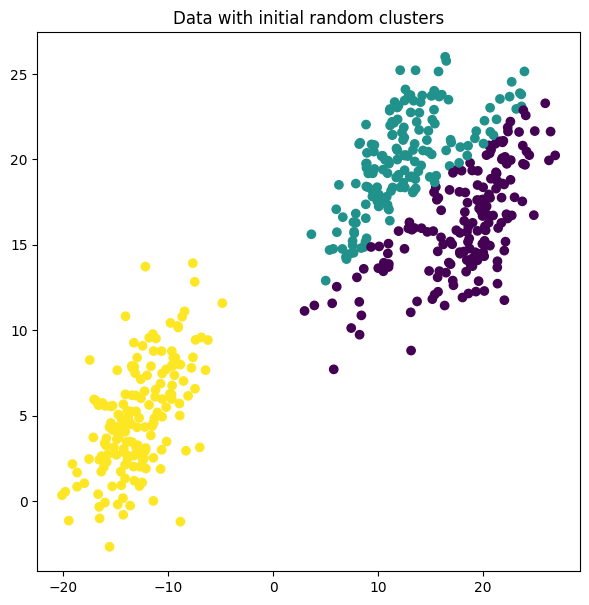

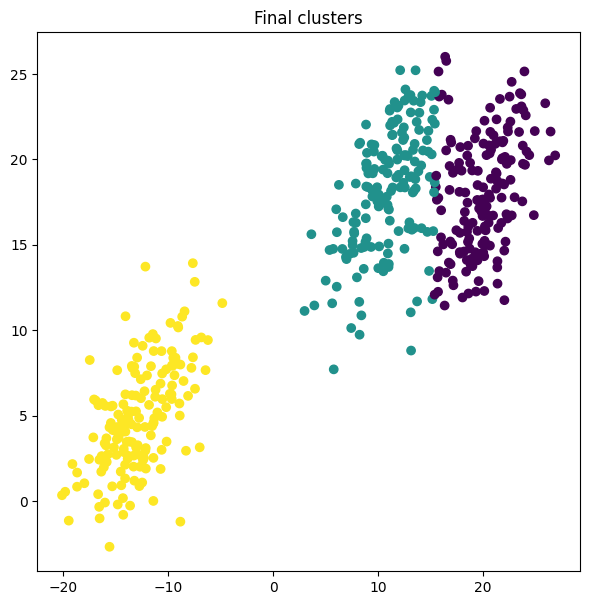

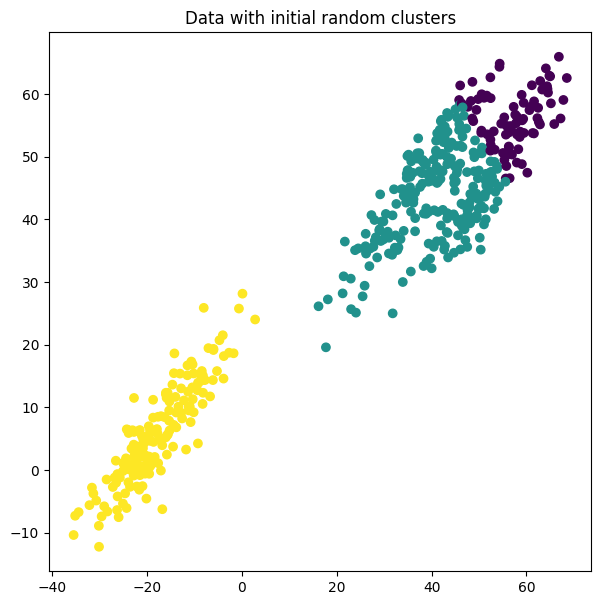

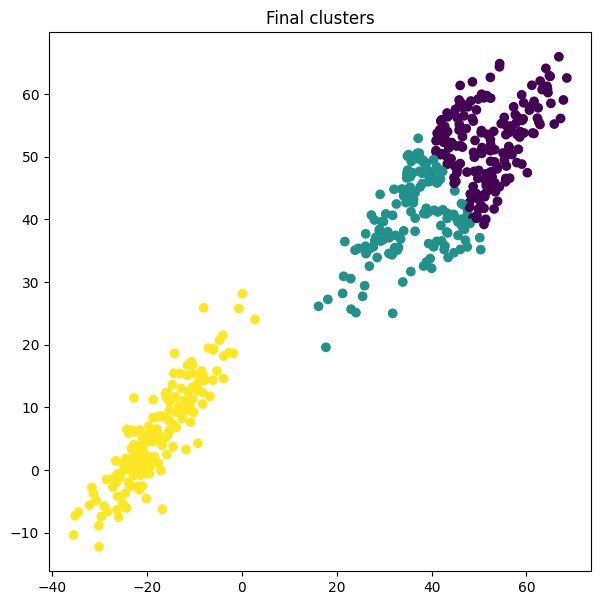

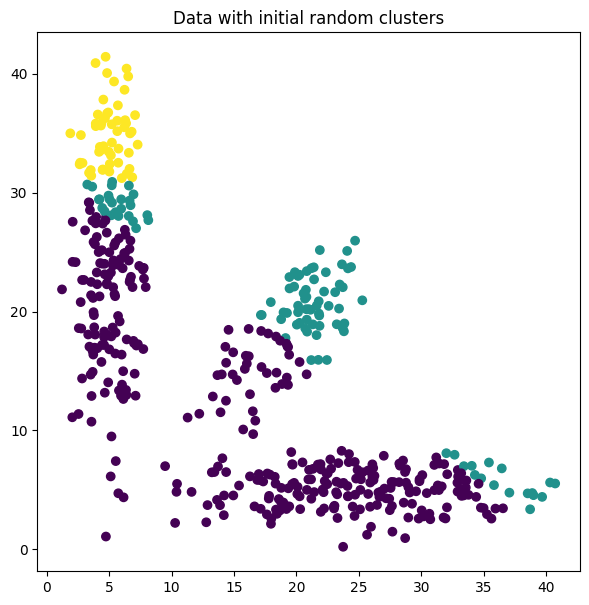

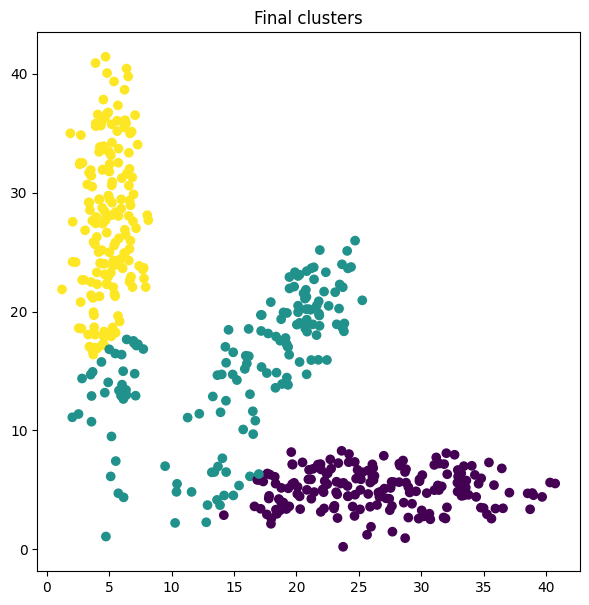

In [7]:
#### Feel free to modify the code below
km1 = KmeansModel(X1, 3, 100)
km1.run()

km2 = KmeansModel(X2, 3, 100)
km2.run()

km3 = KmeansModel(X3, 3, 100)
km3.run()

# PART 2 - PCA

PCA is a technique used to reduce the dimensions of a dataset that has a large number of features. This is possible by finding the principle components (or principle axes) of a dataset. We sort the principle components by the size of their corresponding eiganvalues. PC1 is the principle component with the largest eigenvalue and data has the largest variance across its axis. PC2 has the next highest eigenvalue and so on . To reduce the dimensions of the dataset, we map the dataset onto the first n principle components. We can decide the value of n based on the amount of information we want to keep. The lower the n, the less information the transformed data contains.

<b><u>Use Cases:</u></b>
- Visualizing clustering results for K-mean.
- Improving prediction speed for KNN algorithm. 
- Data compression. 

### Task:
Given the following matrix of 6 points in 7 dimensions. Project these 6 points on to two pricinple components (2-dimensions). You may use Numpy built-in methods or any other tool to compute steps like covariance matrix, eigenvectors, eigenvalues etc.

$$\begin{bmatrix} 13.77 & 1.9 & 2.68 & 17.1 &115 &3.0 &12.79 \\
13.74 & 1.67 & 2.25 & 16.4 & 118 & 2.6 & 15.9 \\
13.56 &	1.73 & 2.46 & 20.5 & 116 & 2.96 & 10.78\\
14.22 &	1.70 & 2.30	& 16.3 & 118 & 3.2 & 9.03\\
13.29 &	1.97 & 2.68	& 16.8 & 113 & 3.9 & 12.23 \\
13.72 &	1.43 & 2.50	& 16.7 & 117 & 3.4 & 13.80 \end{bmatrix}$$


**Steps:**

Step 1: normalization
- Substract the column mean of the points from each point.
- Divide each point by the column standard deviation of the points. 

Step 2: compute the covariance matrix
- Find the covariance matrix of the resulting data.
 
Step 3: Find the eigenvectors and eigenvalues of the covariance matrix.
- Sort the eigenvalues in **ascending** order based on their **magnitudes**.
- Sort both eigenvectors in **ascending** order based on the **magnitude** of their corresponding **eigenvalues**.
- Reorganize the eigenvectors row-wise. This means each row is an eigenvector.(Depending on the output of the previous step, you could potenially skip this step.)

Step 4: projection
- Pick the two eigenvectors with the largest magnitude of eigenvalues.
- Project the normalized data onto the two selected eigenvectors. (Matrix multiplication)

**What to print:** (8 points)
1.	Data after normalization.
2.	Covariance matrix.
3.	Eigenvectors and corresponding eigenvalues.
4.	Final projected data in two dimensions.


In [8]:
A = np.array([
    [13.77 , 1.9 , 2.68 , 17.1 ,115 ,3.0 ,12.79 ],
    [13.74 , 1.67 , 2.25 , 16.4 , 118 , 2.6 , 15.9 ],
    [13.56 ,1.73 , 2.46 , 20.5 , 116 , 2.96 , 10.78],
    [14.22 ,1.70 , 2.30	, 16.3 , 118 , 3.2 , 9.03],
    [13.29 ,1.97 , 2.68	, 16.8 , 113 , 3.9 , 12.23 ],
    [13.72 ,1.43 , 2.50	, 16.7 , 117 , 3.4 , 13.80 ]
])

1. Print the data after subtracting the mean and dividing by standard deviation. The output should be a 2D numpy ndarray. (2 points)

In [9]:
### Your code here ###
import pandas as pd

# Substract the column mean of the points from each point
# Divide each point by the column standard deviation of the points 
normalized_A = (A - A.mean(axis=0)) / A.std(axis=0)

# Whoever is reading this, this is easier for me to read
# Please don't deduct points :(
pd.DataFrame(normalized_A)

,0,1,2,3,4,5,6
0,0.191923,0.959765,1.212123,-0.137469,-0.658505,-0.436173,0.169391
1,0.083966,-0.364711,-1.372404,-0.618609,1.034793,-1.423736,1.599636
2,-0.563775,-0.019195,-0.110193,2.199499,-0.094072,-0.534930,-0.754979
3,1.811276,-0.191953,-1.071877,-0.687343,1.034793,0.057608,-1.559779
4,-1.535386,1.362867,1.212123,-0.343672,-1.787370,1.785842,-0.088145
5,0.011995,-1.746773,0.130228,-0.412406,0.470360,0.551389,0.633876


2. Print the covariance matrix. The output should be a 2D numpy ndarray. (2 points)

In [10]:
### Your code here ###

# Find the covariance matrix of the resulting data
# Set rowvar = False, as there are 6 points in R7
covariance_matrix = np.cov(normalized_A, rowvar=False)

pd.DataFrame(covariance_matrix)

,0,1,2,3,4,5,6
0,1.200000,-0.459352,-0.724291,-0.408119,0.927556,-0.506535,-0.417957
1,-0.459352,1.200000,0.659247,0.087079,-0.892759,0.314110,-0.266860
2,-0.724291,0.659247,1.200000,0.141290,-1.084481,0.731782,-0.051846
3,-0.408119,0.087079,0.141290,1.200000,-0.209498,-0.223323,-0.366486
4,0.927556,-0.892759,-1.084481,-0.209498,1.200000,-0.801745,0.091284
5,-0.506535,0.314110,0.731782,-0.223323,-0.801745,1.200000,-0.369048
6,-0.417957,-0.266860,-0.051846,-0.366486,0.091284,-0.369048,1.200000


3. Compute eigenvalues and eigenvectors, and arrange them in the required format. (2 points)

- 3.1. Print all eigenvalues (sorted the in **ascending** order based on their **magnitudes**). The output should be a 1D numpy ndarray. (1 points)

In [11]:
### Your code here ###

# Sort the eigenvalues in ascending order based on their magnitudes

# The covariance matrix is symmetric
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_eigenvalues = eigenvalues[np.argsort(np.abs(eigenvalues))] # EDIT: Added absolute value for magnitude

# Sorted in ascending order based on magnitudes
pd.DataFrame(sorted_eigenvalues)

,0
0,9.080487e-17
1,-1.456911e-16
2,3.398994e-01
3,8.554469e-01
4,1.433096e+00
5,1.615241e+00
6,4.156317e+00


- 3.2. Print all eigenvectors (sorted in **ascending** order based on the **magnitude** of their corresponding **eigenvalues**). The output should be a 2D numpy ndarray, each row is an eigenvector. (1 points)

In [12]:
### Your code here ###

# Sort both eigenvectors in ascending order based on the magnitude of their corresponding eigenvalues
# Reorganize the eigenvectors row-wise. This means each row is an eigenvector.(Depending on the output of the previous step, you could potenially skip this step.)

sorted_eigenvectors = eigenvectors[:, np.argsort(np.abs(eigenvalues))] # EDIT: Added absolute value for magnitude
reorganized_sorted_eigenvectors = sorted_eigenvectors.T
pd.DataFrame(reorganized_sorted_eigenvectors)

,0,1,2,3,4,5,6
0,-0.487942,0.135934,0.342680,-0.188087,0.716388,-0.088061,-0.263934
1,0.046694,0.371488,0.229865,0.237786,0.732452,0.391613,0.246148
2,0.438900,-0.275946,0.797002,0.055096,-0.023909,-0.294486,0.075362
3,0.218352,0.781726,-0.039691,-0.219784,-0.072347,-0.528271,0.083918
4,0.330848,0.016925,0.065210,-0.805021,-0.004090,0.474284,-0.113927
5,0.363421,0.157667,-0.047040,0.333286,0.029197,0.109904,-0.846665
6,-0.417231,0.383348,0.483859,0.109125,-0.535963,0.376739,-0.061209


4. Print the projection of the data onto the two eigenvectors with the largest magnitude of eigenvalues. The output should be a 2D numpy ndarray. (2 points)

In [13]:
### Your code here ###

# Pick the two eigenvectors with the largest magnitude of eigenvalues.
# Project the normalized data onto the two selected eigenvectors. (Matrix multiplication)

two_eigenvectors_with_largest_magnitude = sorted_eigenvectors[:, -2:]

pd.DataFrame(np.dot(normalized_A, two_eigenvectors_with_largest_magnitude))

,0,1
0,-0.092344,1.037586
1,-1.649221,-2.095300
2,1.108009,0.309669
3,1.806486,-1.860383
4,-0.295957,3.348211
5,-0.876972,-0.739783


### STOP ! Have you run all the code blocks ? 
If not, please do so. All the requested code output should be visible. 

## Submission:
Please submit your notebook (.ipynb file) and an exported PDF copy (you can upload seperately without zipping the files) on GradeScope under the correct assignment with all of the cell outputs visible. It is normal to see Grapescope auto-grader outputs a score of 0.

If you are running on Datahub or the Anaconda Navigator and you are having trouble with exporting to PDF, you can use browser print page. If nothing works, you can submit without the PDF. Note, the .ipynb notebook file is required. 

